In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("raw/time_series_60min_singleindex.csv")
data

,utc_timestamp,cet_cest_timestamp,AT_load_actual_entsoe_transparency,AT_load_forecast_entsoe_transparency,AT_price_day_ahead,AT_solar_generation_actual,AT_wind_onshore_generation_actual,BE_load_actual_entsoe_transparency,BE_load_forecast_entsoe_transparency,BE_solar_generation_actual,...,SI_load_actual_entsoe_transparency,SI_load_forecast_entsoe_transparency,SI_solar_generation_actual,SI_wind_onshore_generation_actual,SK_load_actual_entsoe_transparency,SK_load_forecast_entsoe_transparency,SK_solar_generation_actual,SK_wind_onshore_generation_actual,UA_load_actual_entsoe_transparency,UA_load_forecast_entsoe_transparency
0,2014-12-31T23:00:00Z,2015-01-01T00:00:00+0100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-01-01T00:00:00Z,2015-01-01T01:00:00+0100,5946.0,6701.0,35.0,NaN,69.0,9484.0,9897.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2015-01-01T01:00:00Z,2015-01-01T02:00:00+0100,5726.0,6593.0,45.0,NaN,64.0,9152.0,9521.0,NaN,...,1045.47,816.0,NaN,1.17,2728.0,2860.0,3.8,NaN,NaN,NaN
3,2015-01-01T02:00:00Z,2015-01-01T03:00:00+0100,5347.0,6482.0,41.0,NaN,65.0,8799.0,9135.0,NaN,...,1004.79,805.0,NaN,1.04,2626.0,2810.0,3.8,NaN,NaN,NaN
4,2015-01-01T03:00:00Z,2015-01-01T04:00:00+0100,5249.0,6454.0,38.0,NaN,64.0,8567.0,8909.0,NaN,...,983.79,803.0,NaN,1.61,2618.0,2780.0,3.8,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50396,2020-09-30T19:00:00Z,2020-09-30T21:00:00+0200,6661.0,6656.0,NaN,NaN,1847.0,9402.0,9720.0,NaN,...,1506.95,1530.0,5.32,0.44,3324.0,3170.0,1.7,1.1,NaN,NaN
50397,2020-09-30T20:00:00Z,2020-09-30T22:00:00+0200,6336.0,6310.0,NaN,NaN,1723.0,9219.0,9418.0,NaN,...,1391.15,1388.0,5.57,0.62,3099.0,3010.0,1.7,1.0,NaN,NaN
50398,2020-09-30T21:00:00Z,2020-09-30T23:00:00+0200,5932.0,5813.0,NaN,NaN,1771.0,8763.0,8873.0,NaN,...,1250.17,1274.0,5.58,0.66,2940.0,2890.0,1.6,1.0,NaN,NaN
50399,2020-09-30T22:00:00Z,2020-10-01T00:00:00+0200,5628.0,5424.0,NaN,NaN,1779.0,8131.0,8285.0,NaN,...,1206.82,1178.0,5.61,0.21,2823.0,2740.0,1.7,1.2,NaN,NaN


In [3]:
data = data.iloc[1:] # remove first row
data = data[["utc_timestamp", "GR_load_actual_entsoe_transparency", "GR_solar_generation_actual"]]
data

,utc_timestamp,GR_load_actual_entsoe_transparency,GR_solar_generation_actual
1,2015-01-01T00:00:00Z,NaN,NaN
2,2015-01-01T01:00:00Z,5226.83,NaN
3,2015-01-01T02:00:00Z,4987.34,NaN
4,2015-01-01T03:00:00Z,4879.48,NaN
5,2015-01-01T04:00:00Z,4909.53,NaN
...,...,...,...
50396,2020-09-30T19:00:00Z,4952.99,NaN
50397,2020-09-30T20:00:00Z,4682.26,NaN
50398,2020-09-30T21:00:00Z,4341.00,NaN
50399,2020-09-30T22:00:00Z,4062.00,NaN


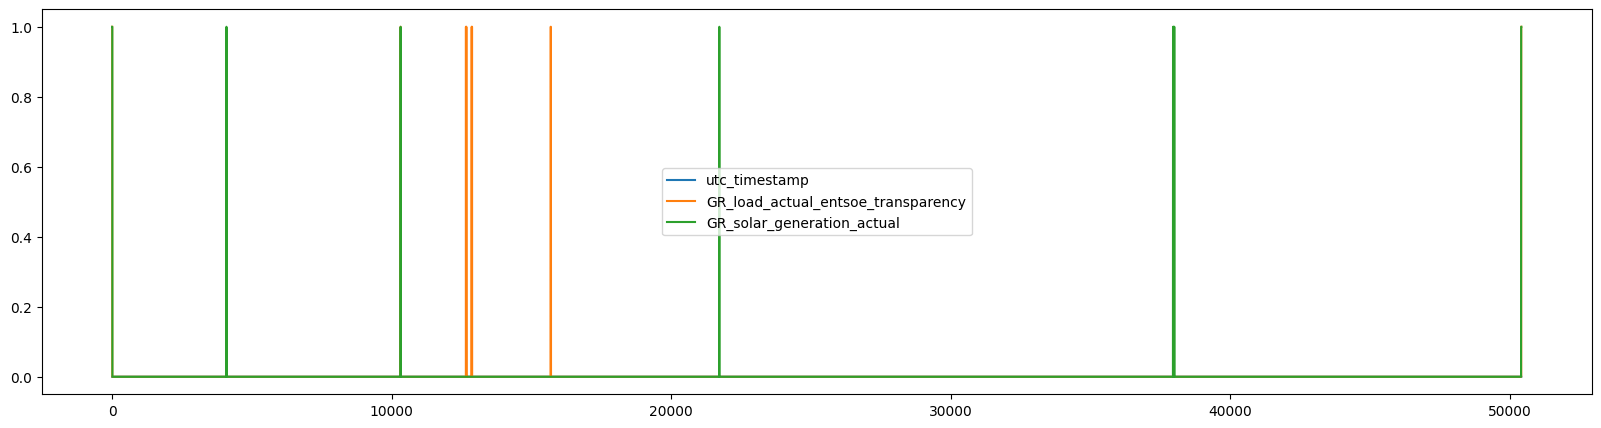

In [4]:
# plot the nan values
plt.figure(figsize=(20, 5))
plt.plot(data.isna())
plt.legend(data.columns)
plt.show()

In [5]:
data = data.iloc[:26280]    # select the first three years (3 * 365 * 24 = 26280)
data["utc_timestamp"] = pd.to_datetime(data["utc_timestamp"], format="%Y-%m-%dT%H:%M:%SZ")
data["date"] = data["utc_timestamp"].dt.date
data["time"] = data["utc_timestamp"].dt.time
data.drop(columns=["utc_timestamp"], inplace=True)
data = data[["date", "time", "GR_load_actual_entsoe_transparency", "GR_solar_generation_actual"]]
data

/tmp/ipykernel_1822027/2076915075.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["utc_timestamp"] = pd.to_datetime(data["utc_timestamp"], format="%Y-%m-%dT%H:%M:%SZ")
/tmp/ipykernel_1822027/2076915075.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["date"] = data["utc_timestamp"].dt.date
/tmp/ipykernel_1822027/2076915075.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats

,date,time,GR_load_actual_entsoe_transparency,GR_solar_generation_actual
1,2015-01-01,00:00:00,NaN,NaN
2,2015-01-01,01:00:00,5226.83,NaN
3,2015-01-01,02:00:00,4987.34,NaN
4,2015-01-01,03:00:00,4879.48,NaN
5,2015-01-01,04:00:00,4909.53,NaN
...,...,...,...,...
26276,2017-12-30,19:00:00,6804.04,0.0
26277,2017-12-30,20:00:00,6305.45,0.0
26278,2017-12-30,21:00:00,5860.52,0.0
26279,2017-12-30,22:00:00,5325.35,0.0


In [6]:
# calculate the mean for each time and fill nan values
time_mean = data.drop(["date"], axis=1).groupby("time").mean()
time_mean

,GR_load_actual_entsoe_transparency,GR_solar_generation_actual
time,,
00:00:00,4636.839735,2.621572
01:00:00,4543.642228,4.928702
02:00:00,4516.769406,3.436624
03:00:00,4621.738948,15.583486
04:00:00,4991.943001,73.340348
05:00:00,5531.030704,272.393870
06:00:00,5971.149857,597.586380
07:00:00,6303.461615,932.500914
08:00:00,6500.720941,1179.480804


In [7]:
def fillna_with_time_mean(row):
    row.fillna(time_mean.loc[row["time"]], inplace=True)
    return row

data = data.apply(fillna_with_time_mean, axis=1)
data

,date,time,GR_load_actual_entsoe_transparency,GR_solar_generation_actual
1,2015-01-01,00:00:00,4636.839735,2.621572
2,2015-01-01,01:00:00,5226.830000,4.928702
3,2015-01-01,02:00:00,4987.340000,3.436624
4,2015-01-01,03:00:00,4879.480000,15.583486
5,2015-01-01,04:00:00,4909.530000,73.340348
...,...,...,...,...
26276,2017-12-30,19:00:00,6804.040000,0.000000
26277,2017-12-30,20:00:00,6305.450000,0.000000
26278,2017-12-30,21:00:00,5860.520000,0.000000
26279,2017-12-30,22:00:00,5325.350000,0.000000


In [8]:
# scale the values
data["GR_load_actual_entsoe_transparency"] /= 50
data

,date,time,GR_load_actual_entsoe_transparency,GR_solar_generation_actual
1,2015-01-01,00:00:00,92.736795,2.621572
2,2015-01-01,01:00:00,104.536600,4.928702
3,2015-01-01,02:00:00,99.746800,3.436624
4,2015-01-01,03:00:00,97.589600,15.583486
5,2015-01-01,04:00:00,98.190600,73.340348
...,...,...,...,...
26276,2017-12-30,19:00:00,136.080800,0.000000
26277,2017-12-30,20:00:00,126.109000,0.000000
26278,2017-12-30,21:00:00,117.210400,0.000000
26279,2017-12-30,22:00:00,106.507000,0.000000


In [9]:
# read Greece.csv
gr_prices = pd.read_csv("raw/Greece.csv")
gr_prices.drop(columns=["Country", "ISO3 Code", "Datetime (Local)"], inplace=True)
gr_prices["Datetime (UTC)"] = pd.to_datetime(gr_prices["Datetime (UTC)"], format="%Y-%m-%d %H:%M:%S")
gr_prices["date"] = gr_prices["Datetime (UTC)"].dt.date
gr_prices["time"] = gr_prices["Datetime (UTC)"].dt.time
gr_prices.drop(columns=["Datetime (UTC)"], inplace=True)
gr_prices = gr_prices[["date", "time", "Price (EUR/MWhe)"]].iloc[:26280]
gr_prices

,date,time,Price (EUR/MWhe)
0,2015-01-01,00:00:00,48.78
1,2015-01-01,01:00:00,31.10
2,2015-01-01,02:00:00,20.78
3,2015-01-01,03:00:00,25.40
4,2015-01-01,04:00:00,26.00
...,...,...,...
26275,2017-12-30,19:00:00,58.02
26276,2017-12-30,20:00:00,55.37
26277,2017-12-30,21:00:00,53.03
26278,2017-12-30,22:00:00,54.84


In [10]:
# merge by date and time
data = data.merge(gr_prices, on=["date", "time"])
data

,date,time,GR_load_actual_entsoe_transparency,GR_solar_generation_actual,Price (EUR/MWhe)
0,2015-01-01,00:00:00,92.736795,2.621572,48.78
1,2015-01-01,01:00:00,104.536600,4.928702,31.10
2,2015-01-01,02:00:00,99.746800,3.436624,20.78
3,2015-01-01,03:00:00,97.589600,15.583486,25.40
4,2015-01-01,04:00:00,98.190600,73.340348,26.00
...,...,...,...,...,...
26275,2017-12-30,19:00:00,136.080800,0.000000,58.02
26276,2017-12-30,20:00:00,126.109000,0.000000,55.37
26277,2017-12-30,21:00:00,117.210400,0.000000,53.03
26278,2017-12-30,22:00:00,106.507000,0.000000,54.84


In [11]:
data.drop(columns=["date", "time"], inplace=True)
data.columns = ["load", "solar", "price"]
train_data = data.iloc[:17520]
test_data = data.iloc[17520:]
train_data

,load,solar,price
0,92.736795,2.621572,48.78
1,104.536600,4.928702,31.10
2,99.746800,3.436624,20.78
3,97.589600,15.583486,25.40
4,98.190600,73.340348,26.00
...,...,...,...
17515,147.240000,0.000000,54.90
17516,137.380000,0.000000,50.18
17517,129.780000,0.000000,50.16
17518,122.800000,0.000000,47.70


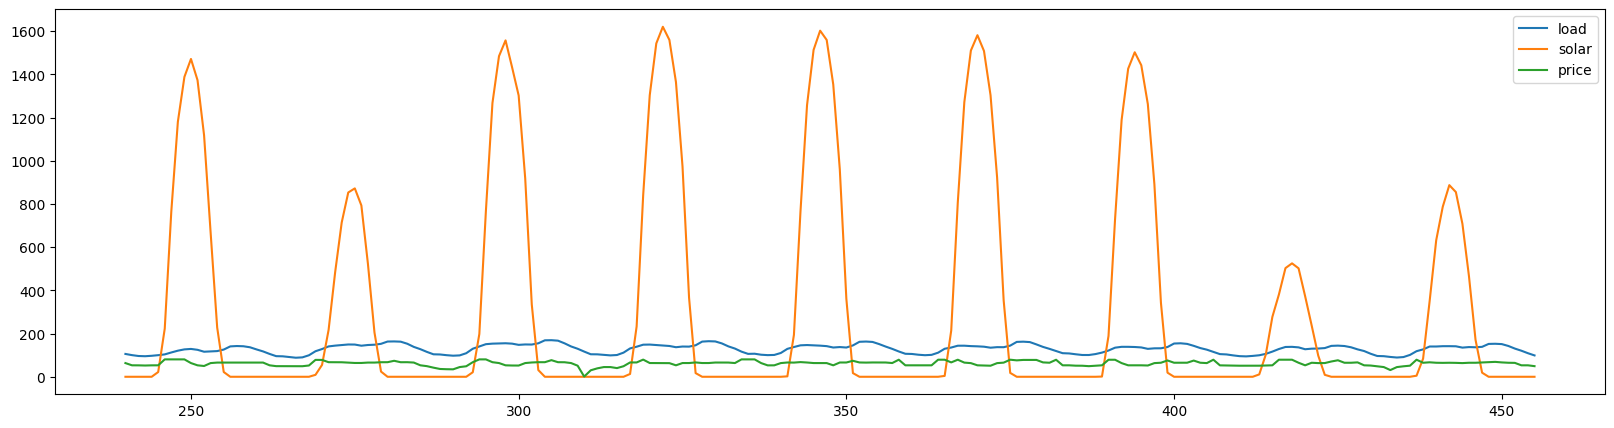

In [14]:
# plot random 9 consecutive days
start_day = 10
plt.figure(figsize=(20, 5))
plt.plot(train_data.iloc[start_day * 24 : (start_day + 9) * 24])
plt.legend(train_data.columns)
plt.show()

In [15]:
# save the data
train_data.to_csv("preprocessed/train.csv", index=False)
test_data.to_csv("preprocessed/test.csv", index=False)